In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [19]:
print("My train data Shape:", train_data.shape)
print("My train labels :", train_labels.shape)
print("Maximum label : ", train_labels.max())

My train data Shape: (60000, 28, 28)
My train labels : (60000,)
Maximum label :  9


Text(0.5, 1.0, 'Bag')

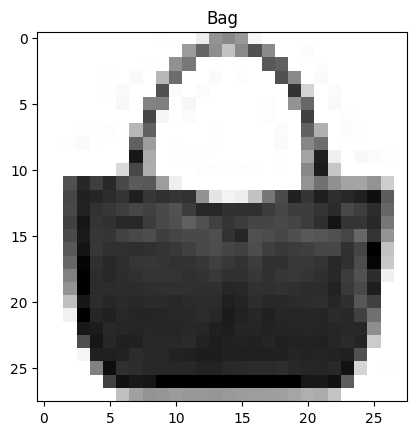

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
index_of_choice = 100
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

In [21]:
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= train_data[0].shape),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ["Accuracy"])
norm_history = model.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - Accuracy: 0.3378 - loss: 1.7235 - val_Accuracy: 0.6370 - val_loss: 1.0584
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.6619 - loss: 0.9857 - val_Accuracy: 0.6893 - val_loss: 0.9182
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.6985 - loss: 0.8687 - val_Accuracy: 0.7082 - val_loss: 0.8363
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - Accuracy: 0.7167 - loss: 0.8099 - val_Accuracy: 0.7155 - val_loss: 0.8099
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.7248 - loss: 0.7879 - val_Accuracy: 0.7283 - val_loss: 0.7837
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.7334 - loss: 0.7608 - val_Accuracy: 0.7373 - val_loss: 0.7710
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Accuracy: 0.7371 - loss: 0.7510 - val_Accuracy: 0.7342 - val_loss: 0.7672
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.7407 - loss: 0.7483 - 

In [22]:
y_pred_probs = model.predict(test_data_norm)
y_pred = y_pred_probs.argmax(axis=1)

y_true = test_labels

cm = confusion_matrix(y_true, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


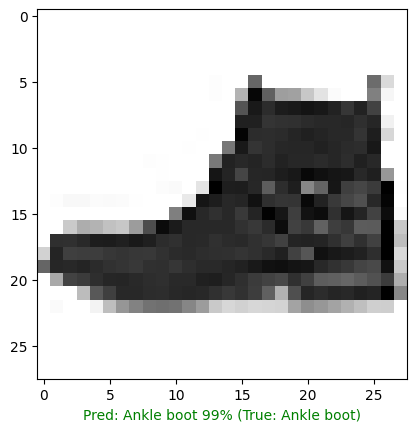

In [23]:
import random
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  image_to_predict = images[i]
  true_positive_image = classes[true_labels[i]]
  pred_probs = model.predict(tf.expand_dims(image_to_predict, axis=0))
  predicted_image = classes[pred_probs.argmax()]

  plt.imshow(image_to_predict, cmap=plt.cm.binary)
  if(predicted_image == true_positive_image):
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(predicted_image,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_positive_image),color=color)

plot_random_image(model, test_data_norm, test_labels, class_names)